# Combining Weekly Wikipedia PageViews and YouTube uploads

## imports

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt


## read csv data

In [4]:
df_wiki = pd.read_csv("csv/quest2_wiki.csv") 
df_wiki

,Unnamed: 0,Alternative_für_Deutschland
0,2024-11-04,5456
1,2024-11-11,21166
2,2024-11-18,34774
3,2024-11-25,15952
4,2024-12-02,13269
5,2024-12-09,14185
6,2024-12-16,14376
7,2024-12-23,27081
8,2024-12-30,20642
9,2025-01-06,21271


In [6]:
df_videos = pd.read_csv("csv/quest2_yt.csv")
df_videos

,Published At,Number of Videos
0,2024-11-04 00:00:00+00:00,23
1,2024-11-11 00:00:00+00:00,36
2,2024-11-18 00:00:00+00:00,52
3,2024-11-25 00:00:00+00:00,50
4,2024-12-02 00:00:00+00:00,24
5,2024-12-09 00:00:00+00:00,20
6,2024-12-16 00:00:00+00:00,30
7,2024-12-23 00:00:00+00:00,40
8,2024-12-30 00:00:00+00:00,24
9,2025-01-06 00:00:00+00:00,46


## merging both dataframes 

In [7]:
# Rename columns for clarity
df_wiki = df_wiki.rename(columns={'Unnamed: 0': 'Published At', 'Alternative_für_Deutschland' : 'Wikipedia Pageviews'})

# Ensure both columns are datetime
df_videos['Published At'] = pd.to_datetime(df_videos['Published At'], errors='coerce')
df_wiki['Published At'] = pd.to_datetime(df_wiki['Published At'], errors='coerce')

# Remove timezone from df_videos if it exists
if df_videos['Published At'].dt.tz is not None:
    df_videos['Published At'] = df_videos['Published At'].dt.tz_localize(None)


# Merge on 'Published At'
df_merged = pd.merge(df_videos, df_wiki, on='Published At', how='inner')


df_merged

,Published At,Number of Videos,Wikipedia Pageviews
0,2024-11-04,23,5456
1,2024-11-11,36,21166
2,2024-11-18,52,34774
3,2024-11-25,50,15952
4,2024-12-02,24,13269
5,2024-12-09,20,14185
6,2024-12-16,30,14376
7,2024-12-23,40,27081
8,2024-12-30,24,20642
9,2025-01-06,46,21271


In [8]:
def normalize_to_relative(df, columns):
    """
    Convert the specified columns in a DataFrame to relative values
    (each value divided by the total of its column).

    Parameters:
        df (pd.DataFrame): Input DataFrame
        columns (list): List of column names to normalize

    Returns:
        pd.DataFrame: DataFrame with normalized columns
    """
    df_relative = df.copy()
    for col in columns:
        total = df_relative[col].sum()
        df_relative[col] = df_relative[col] / total*100
    return df_relative

# Example usage:
columns_to_normalize = ['Number of Videos', 'Wikipedia Pageviews']
df_relative = normalize_to_relative(df_merged, columns_to_normalize)

# Make 'Published At' the index
df_relative = df_relative.set_index('Published At')

df_relative

,Number of Videos,Wikipedia Pageviews
Published At,,
2024-11-04,2.037201,0.737647
2024-11-11,3.188663,2.861628
2024-11-18,4.605846,4.701419
2024-11-25,4.428698,2.156699
2024-12-02,2.125775,1.793959
2024-12-09,1.771479,1.917802
2024-12-16,2.657219,1.943625
2024-12-23,3.542958,3.661331
2024-12-30,2.125775,2.790783


## Plotting and saving Data

<Axes: title={'center': 'WikipediaPage Views and Youtube Video Uploads in Percent'}, xlabel='Published At'>

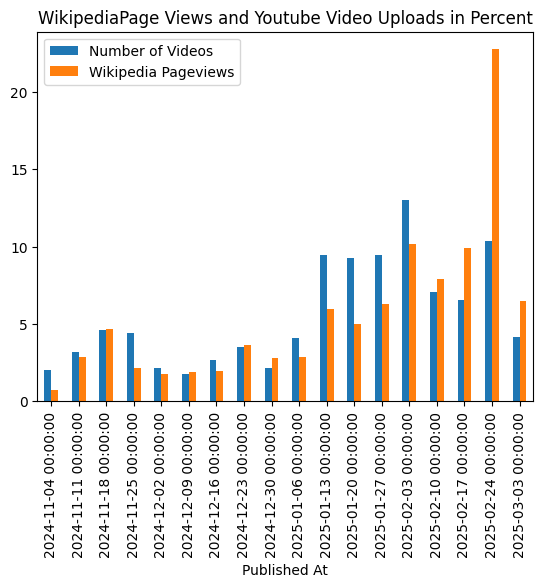

In [9]:
plot = df_relative.plot(
    kind='bar',
    title= 'WikipediaPage Views and Youtube Video Uploads in Percent'
)
plot

In [10]:
corr = df_relative['Number of Videos'].corr(df_relative['Wikipedia Pageviews'])
print(f"Pearson correlation: {corr:.2f}")

Pearson correlation: 0.70


In [11]:
import json 

json_str = df_relative.to_json(orient="records", indent=2, force_ascii=False)

with open("AfD_combined_relative.json", "w", encoding="utf-8") as f:
    f.write(json_str)